In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
flowers = load_iris()

In [ ]:
flowers.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

ARRAYS DE 150 FILAS POR 4 COLUMNAS

In [ ]:
flowers.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

NOS DEVUELVE LA CANTIDAD DE FILAS Y COLUMNAS

In [ ]:
flowers.data.shape

(150, 4)

ARRAYS DE 150 VALORES

In [ ]:
flowers.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
class NeuralNet():
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.W2 = np.random.randn(self.hidden_size, self.output_size)

    self.b1 = np.zeros((1, self.hidden_size))
    self.b2 = np.zeros((1, self.output_size))

  def relu(self, x):
    return np.maximum(0, x)

  def relu_derivative(self, x):
    return (x > 0) * 1

  def softmax(self, x):
    exp = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return exp

  def cross_entropy(self, output, y):
    target = self.one_hot(y)
    loss = - np.mean(target * np.log(output + 1e-8))
    return loss

  def accuracy(self, output, target):
    preds = np.argmax(output, axis=1)
    return np.sum(preds == target) / target.size
   
  def one_hot(self, y):
    one_hot_array = np.zeros((y.size, y.max() + 1))
    one_hot_array[np.arange(y.size), y] = 1
    return one_hot_array

  def forward(self, X):
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.relu(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.output = self.softmax(self.z2)
    return self.output

  def backprop(self, X, y):
    output = self.forward(X)
    target = self.one_hot(y)
    delta_out = output - target
    dW2 = np.dot(self.a1.T, delta_out)
    db2 = np.sum(delta_out, axis=0, keepdims=True)
    error_hidden = np.dot(delta_out, self.W2.T)
    delta_hidden = error_hidden * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, delta_hidden)
    db1 = np.sum(delta_hidden, axis=0, keepdims=True)
    return dW2, db2, dW1, db1

  def gradient_desc(self, dW2, db2, dW1, db1, lr):
    self.W2 -= dW2 * lr
    self.b2 -= db2 * lr
    self.W1 -= dW1 * lr
    self.b1 -= db1 * lr
  
  def train(self, epochs, X, y, lr):
    oks = []
    fails = []
    for i in range(epochs):
      output = self.forward(X)
      dW2, db2, dW1, db1 = self.backprop(X, y)
      ok = self.accuracy(output, y)
      oks.append(ok)
      fail = self.cross_entropy(output, y)
      fails.append(fail)
      self.gradient_desc(dW2, db2, dW1, db1, lr)
    X_axis = range(epochs)
    plt.plot(X_axis, oks, c='green')
    plt.plot(X_axis, fails, c='red')
    plt.legend(['Accuracy', 'Loss'])

DATOS

In [ ]:
x = flowers.data
y = flowers.target
#x normalizado
x = x/np.max(x,axis=0,keepdims=True)

In [ ]:
x.shape

(150, 4)

MAXIMO VALOR

In [ ]:
y.max()+1

3

In [ ]:
nn = NeuralNet(x.shape[1], 8,y.max()+1)
output = nn.forward(x)
nn.one_hot(y)
nn.cross_entropy(output,nn.one_hot(y))

0.33449316628058695

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.arange(y.size)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

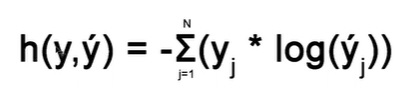

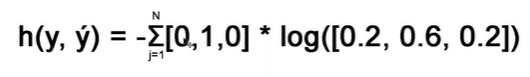

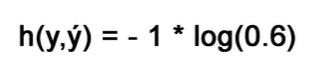

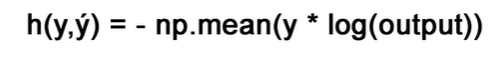

In [ ]:
x

In [ ]:
for i in range (x.shape[1]):
   print(f'El numero minimo en {i} es {np.min(x[:,i])}') 
   print(f'El numero maximo en {i} es {np.max(x[:,i])}') 

In [ ]:
x/np.max(x,axis=0,keepdims=True)

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [ ]:
nn = NeuralNet(x.shape[1],8,y.max()+1)
nn.backprop(x,y)

(array([[ -9.98438325,  -1.98765741,  11.97204066],
        [ 18.45380231,  -5.9459149 , -12.50788741],
        [-26.12492495, -13.47182085,  39.5967458 ],
        [  0.        ,   0.        ,   0.        ],
        [-26.40099421,  -5.12342394,  31.52441815],
        [ 28.46240475, -31.5901501 ,   3.12774534],
        [  6.6168126 ,  -2.51096539,  -4.10584721],
        [  0.        ,   0.        ,   0.        ]]),
 array([[-17.47971044, -12.61742267,  30.09713311]]),
 array([[-20.8606108 ,  40.7977174 ,  20.57440069,   0.        ,
          -2.08125805,  -1.42214546,   0.41670119,   0.        ],
        [-17.54755296,  33.24587167,  30.1642462 ,   0.        ,
          -8.88590752,   2.39323914,  -0.9979186 ,   0.        ],
        [-15.16793677,  37.11513184,  -1.9574765 ,   0.        ,
           7.7320015 ,  -5.64732444,   2.6266469 ,   0.        ],
        [-11.11653787,  35.15746921,  -9.39186126,   0.        ,
           9.74080189,  -6.0980531 ,   3.31827622,   0.        ]]),
 a

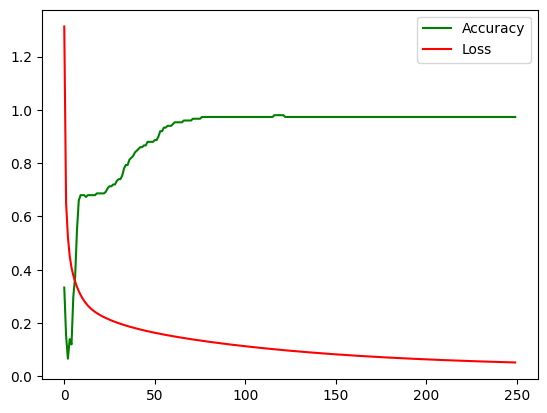

In [ ]:
nn = NeuralNet(x.shape[1], 8, y.max() + 1)
nn.train(250, x, y, 0.001)